Question 1


In [1]:
#Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


256


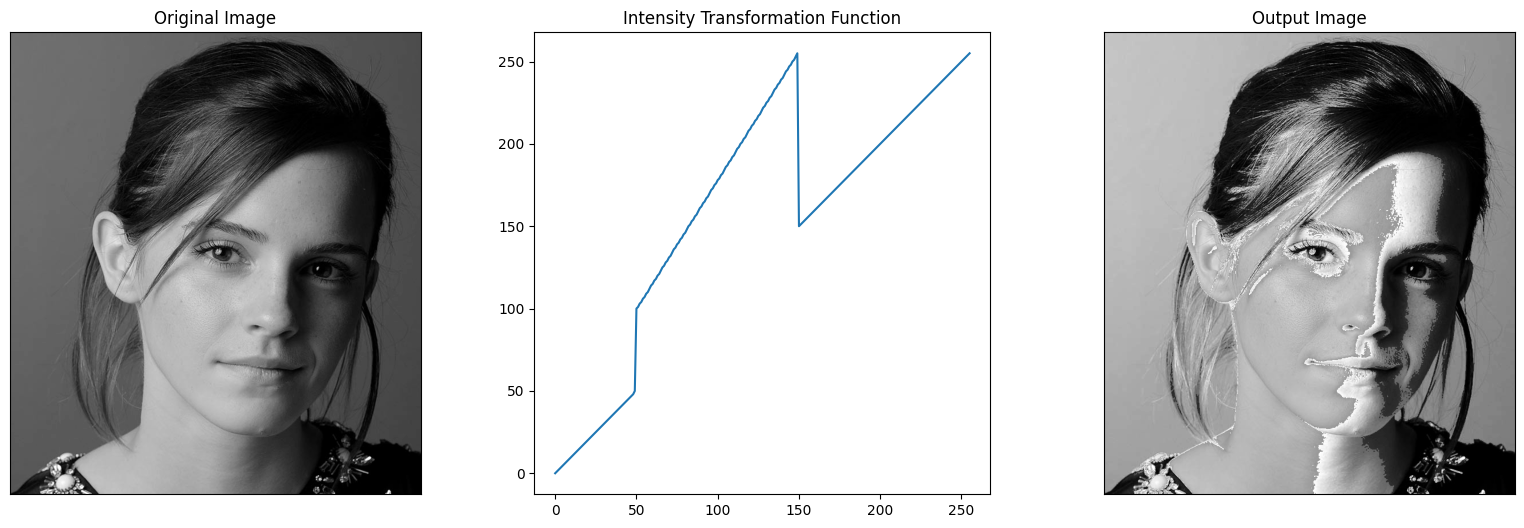

In [2]:
# Define the transformation
transform1 = np.concatenate((np.linspace(0, 50, 50), np.linspace(100, 255, 100), np.linspace(150, 255,106)), axis=0).astype(np.uint8)
print(len(transform1))

# Read the image
image_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
# Apply the transformation
image_transformed = cv.LUT(image_orig, transform1)

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].imshow(image_orig, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original Image")
ax[1].plot(transform1)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(image_transformed, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title("Output Image")
plt.show()



Question 2

Part (a)

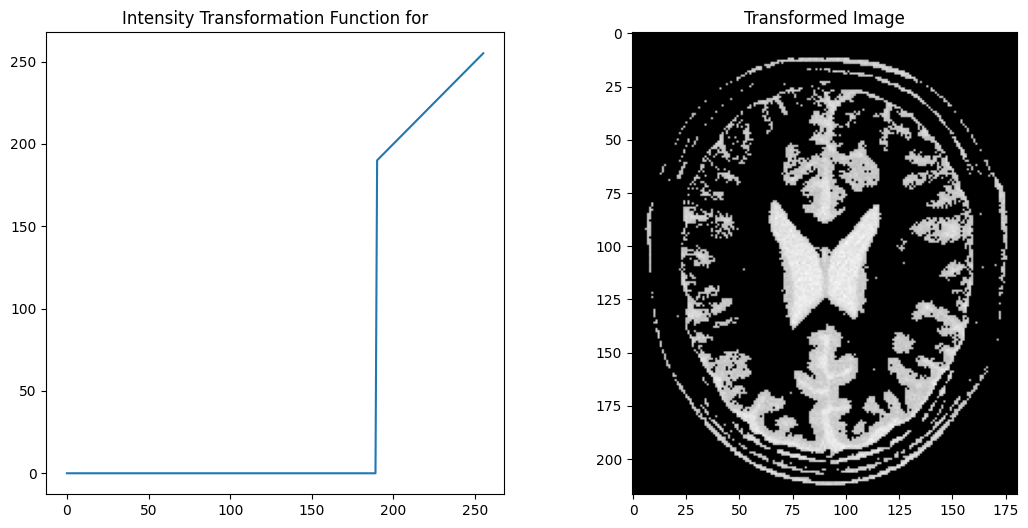

In [3]:
transform2 = np.concatenate((np.linspace(0, 0, 190), np.linspace(190,255, 66)), axis=0).astype(np.uint8)
fig2 = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform2)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ax[0].plot(transform2)
ax[0].set_title("Intensity Transformation Function for")
ax[1].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(True)
ax[1].get_yaxis().set_visible(True)
ax[1].set_title("Transformed Image")

plt.show()

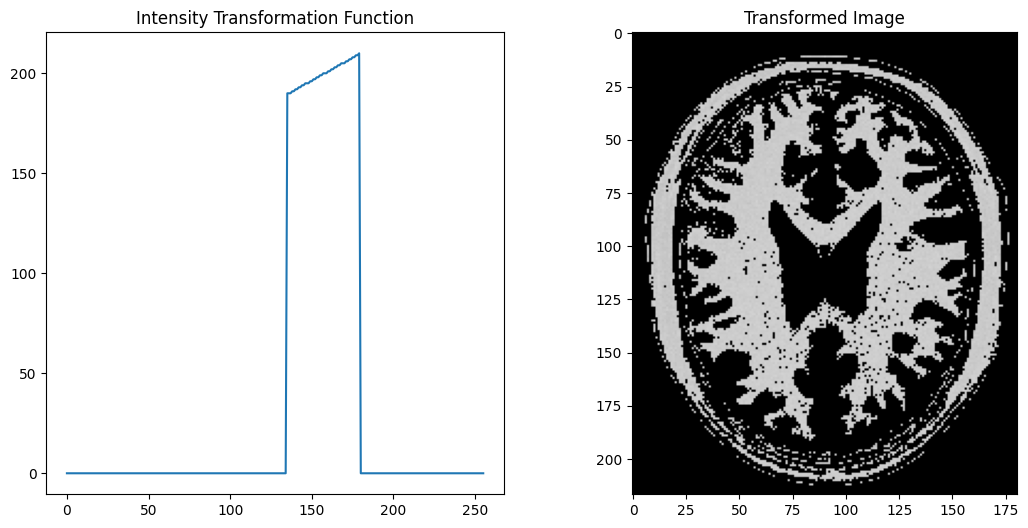

In [4]:
transform3 = np.concatenate((np.linspace(0, 0, 135), np.linspace(190, 210, 45),np.linspace(0, 0, 76)), axis=0).astype(np.uint8)
fig2 = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform3)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ax[0].plot(transform3)
ax[0].set_title("Intensity Transformation Function")
ax[1].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(True)
ax[1].get_yaxis().set_visible(True)
ax[1].set_title("Transformed Image")

plt.show()

Text(0, 0.5, 'Frequency')

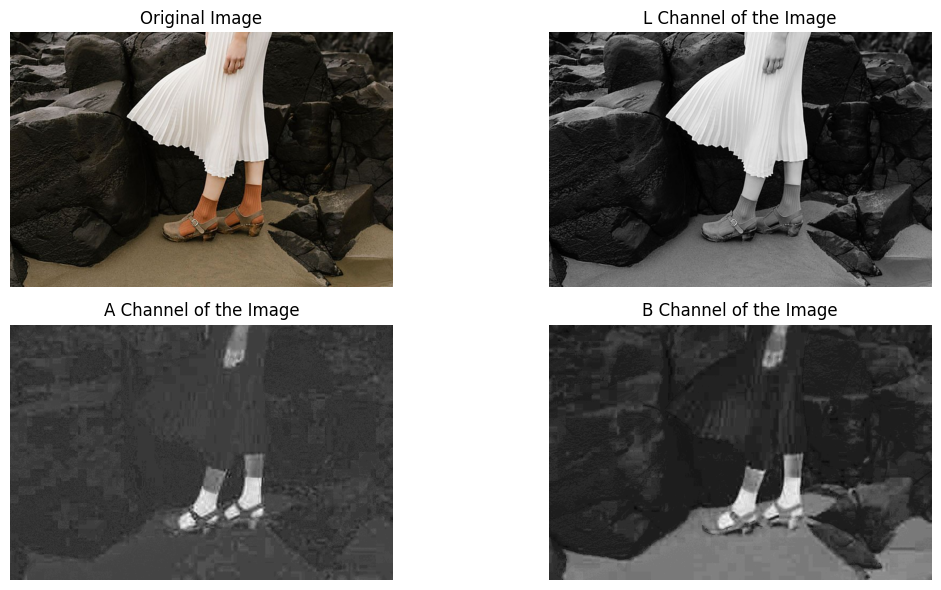

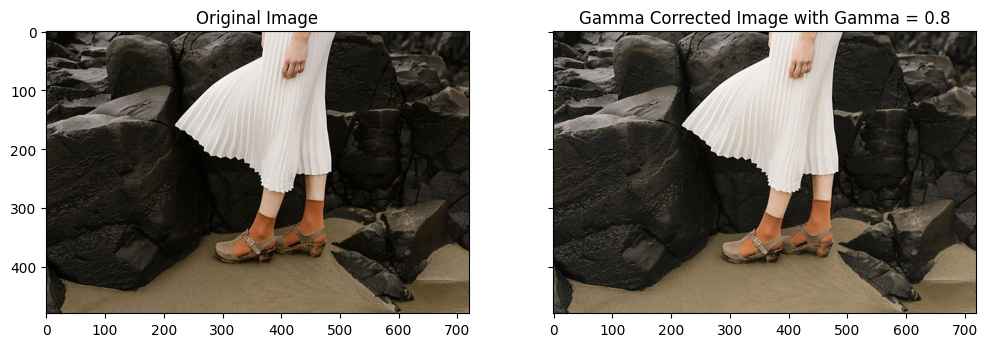

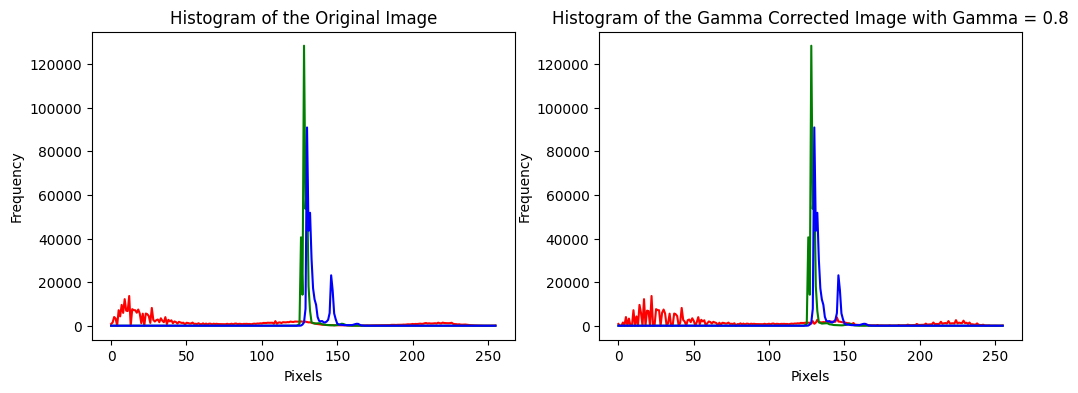

In [5]:
original_image = cv.imread('a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

rgb_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)

# Convert the image into CEILAB color space
CEILAB_image = cv.cvtColor(original_image, cv.COLOR_BGR2Lab) 
# Split the converted image into three channels         
L_chanel, a_channel, b_channel = cv.split(CEILAB_image)           

# Display the images with their respective channels
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(L_chanel, cmap="gray")
plt.title('L Channel of the Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap="gray")
plt.title('A Channel of the Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap="gray")
plt.title('B Channel of the Image')
plt.axis('off')

plt.tight_layout()

# Apply gamma correction to the L channel of the image
gamma = 0.8
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_chanel_gamma_corrected = cv.LUT(L_chanel, table)    

# Merge L channel with other channels
img_gamma = cv.merge((L_chanel_gamma_corrected, a_channel, b_channel))     
img_corrected = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB)


fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,6))
ax[0].imshow(rgb_image)
ax[0].set_title('Original Image')

ax[1].imshow(img_corrected)
ax[1].set_title(f'Gamma Corrected Image with Gamma = {gamma}')


f, ax = plt.subplots(1, 2, figsize=(12, 4))
space = ('l', 'a', 'b')
color = ('r', 'g', 'b')

for i, c in enumerate(space):
    hist_orig = cv.calcHist([CEILAB_image], [i], None, [256], [0, 256]) 
    # Calculate histogram for original image      
    ax[0].plot(hist_orig, color=color[i])
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256]) 
    # Calculate histogram for gamma corrected image      
    ax[1].plot(hist_gamma, color=color[i])


# Plot the histogram of the original image
ax[0].set_title('Histogram of the Original Image')
ax[0].set_xlabel('Pixels')
ax[0].set_ylabel('Frequency')


# Plot the histogram of the gamma corrected image with the gamma value
ax[1].set_title(f'Histogram of the Gamma Corrected Image with Gamma = {gamma}')
ax[1].set_xlabel('Pixels')
ax[1].set_ylabel('Frequency')

In [6]:
def vibrance_function(x,a,sigma = 70):
    return int(min(x + (a*128)*np.exp((-(x-128)**2)/(2*(sigma**2))), 255))

In [7]:

import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from ipywidgets import interactive

def vibrance(x, a, sigma=70):
    return int(min(x + (a*128)*np.exp((-(x-128)**2)/(2*(sigma**2))), 255))  # Transformation function

def transform(a):
    # This function will apply the desired transformation to selected planes of the image
    plt.clf()
    table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')
    s_channel_corrected = cv.LUT(s_channel, table)          # Apply vibrance correction to the saturation plane
    img_corrected = cv.merge((h_channel, s_channel_corrected, v_channel))   # Merge corrected plane with hue and value planes
    img_corrected_rgb = cv.cvtColor(img_corrected, cv.COLOR_HSV2RGB)
    #region
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(img_corrected_rgb)
    plt.title('Intensity Transformed Image')
    plt.axis('off')
    
    plt.show()
    
    a_value = np.arange(0, 256)
    plt.figure(figsize=(4,4))
    plt.plot(a_value,table, label=f'a = {a}')
    plt.title('Intensity Transformation Function')
    plt.xlabel('Input Intensity')
    plt.ylabel('Transformed Intensity')
    plt.legend()
    plt.grid()
    
    plt.show()
    #endregion

img_orig = cv.imread('a1images/spider.png', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)           # Convert the image into HSV color space
h_channel, s_channel, v_channel = cv.split(img_hsv)         # Split the image into hue, saturation and value planes

# Interactive Slider
final_plot = interactive(transform, a=(0, 1, 0.001))
output = final_plot.children[-1]
output.layout.height = '800px'
final_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, step=0.001), Output(layout=Layout(heigh…